<a href="https://colab.research.google.com/github/vierpie/M2-mini-project2/blob/master/RetinaNet_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#use of a pretrained RetinaNet

In [1]:
#install RetinaNet
# first download the repo to the notebooks local directory 
!git clone https://github.com/fizyr/keras-RetinaNet.git

Cloning into 'keras-RetinaNet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
Receiving objects: 100% (6205/6205), 13.48 MiB | 30.06 MiB/s, done.
Resolving deltas: 100% (4197/4197), done.


In [2]:
# cd inside the directory and run pip install
%cd keras-RetinaNet/
!pip install .

/content/keras-RetinaNet
Processing /content/keras-RetinaNet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=168067 sha256=17ac7ea9ee4020b2524d9bbe877151f71734f5eed5b6d97365c24b1cb4ded66d
  Stored in directory: /root/.cache/pip/wheels/de/73/1b/59c735434f98090d609e344814fe50cda85853989237dd6fe5
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=389b279e21391b2a6c2880381902957b3fadbd204e8397a73e2d371c7ba8d23f
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [3]:
# run the python setup command
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-RetinaNet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests # the library to make HTTP requests in python
import urllib #module for fetching URLs
import os
from PIL import Image 

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image #preprocess_image analogous to the function used to preprocess in ResNet
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color #different labels have different colours when drawing the boxes on the images

In [8]:
# download a pretrained retinaNet - there are several others pretrained 
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

('./snapshots/_pretrained_model.h5',
 <http.client.HTTPMessage at 0x7fb8542e1780>)

In [12]:
#load in the model
model = models.load_model('./snapshots/_pretrained_model.h5')

In [13]:
#in DL, NN only encode integers, so we need to match these numbers with categories for the user's readability

!wget https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt

--2020-11-11 12:40:44--  https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘coco_categories.txt’

coco_categories.txt     [ <=>                ]     621  --.-KB/s    in 0s      

2020-11-11 12:40:45 (9.66 MB/s) - ‘coco_categories.txt’ saved [621]



In [14]:
# coco is a standard dataset (like coco, PascalVOC,...). Each of these have specific formats and their own list of categories
class_names = [l.rstrip() for l in open('coco_categories.txt')]
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [21]:
# write a function that takes in an image path as input, plot the image and draw the bounding boxes along with the labels
def show_image_with_predictions(img_path,threshold=0.6):
  im = np.array(Image.open(img_path)) #load the image and turn it into a numpy array
  print('im.shape:',im.shape)

  #if there's a PNG it will have alpha channel
  im = im[:,:,:3] #we remove the 4th dimension - PNG has a transparency dimension

  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im) # returns the input with the ImageNet mean subtracted
  imp, scale = resize_image(im) # resizes an image into the correct input shape, it also returns the scale which will be used to determine the pixel location

  boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(imp, axis=0) #size is batch_size x image_size we add an extraneous dimension to the beginning of the image
  ) #returns predictions for a single batch of arrays, so it returns the boxes, labels, scores for each image that we pass in 

  #standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]): #note we have only one sample in the batch so we index at element nr.0, if more than 1 element than outer loop to loop through each element
    #scores are sorted so we can quit as soon as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    #caption the boxes
    class_name = class_names[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off') #the tickmarcks don't show at the edge of the plot
  plt.imshow(im)
  plt.show()


In [16]:
plt.rcParams['figure.figsize'] = [20,10]


In [17]:
!wget https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg

--2020-11-11 13:10:51--  https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162736 (159K) [image/jpeg]
Saving to: ‘baseball.jpg’

baseball.jpg        100%[===================>] 158.92K  --.-KB/s    in 0.1s    

2020-11-11 13:10:52 (1.37 MB/s) - ‘baseball.jpg’ saved [162736/162736]



im.shape: (430, 638, 3)


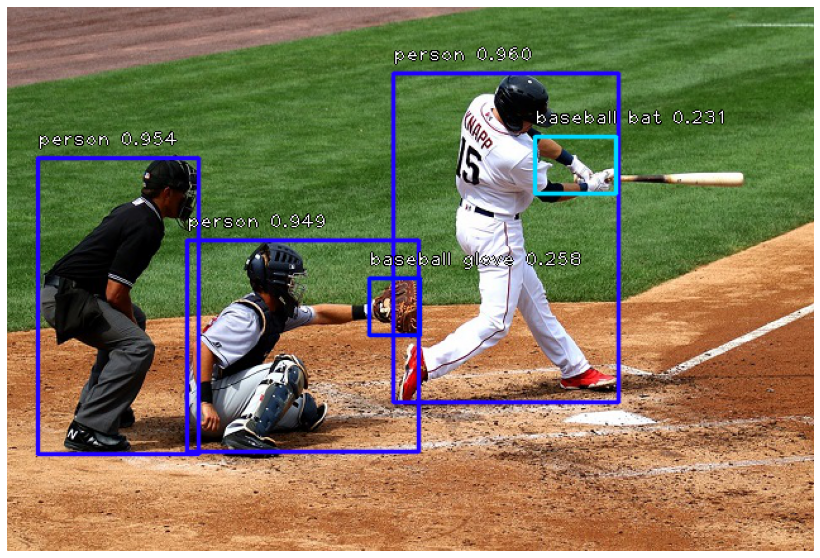

In [23]:
show_image_with_predictions('baseball.jpg',threshold=0.2)

# New section